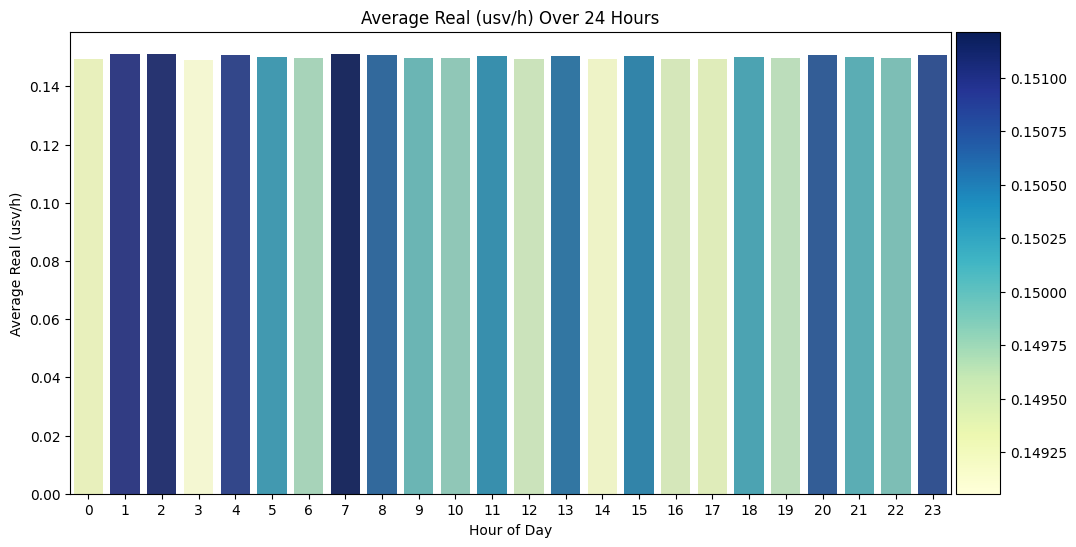

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize empty DataFrame
df = pd.DataFrame()

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    df = pd.concat([df, data])

# Convert 'time' column to datetime and set it as index
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df.set_index('time', inplace=True)

# Resample data by hourly mean
df_resampled = df.resample('H').mean()

# Plotting
fig, ax = plt.subplots(figsize=(12,6))

# Create a color palette based on the values in 'real(usv/h)'
norm = plt.Normalize(df_resampled['real(usv/h)'].min(), df_resampled['real(usv/h)'].max())
sm = plt.cm.ScalarMappable(cmap="YlGnBu", norm=norm)
sm.set_array([])

# Create a barplot and set the color of each bar to the corresponding color from the color palette
sns.barplot(x=df_resampled.index.hour, y=df_resampled['real(usv/h)'], palette="YlGnBu", hue=df_resampled['real(usv/h)'], dodge=False, ax=ax)

# Remove the legend
ax.get_legend().remove()

# Create an axes on the right side of ax. The width of cax will be 5% of ax and the padding between cax and ax will be fixed at 0.05 inch.
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

# Add a colorbar
plt.colorbar(sm, cax=cax)

ax.set_xlabel('Hour of Day')
ax.set_ylabel('Average Real (usv/h)')
ax.set_title('Average Real (usv/h) Over 24 Hours')
plt.show()


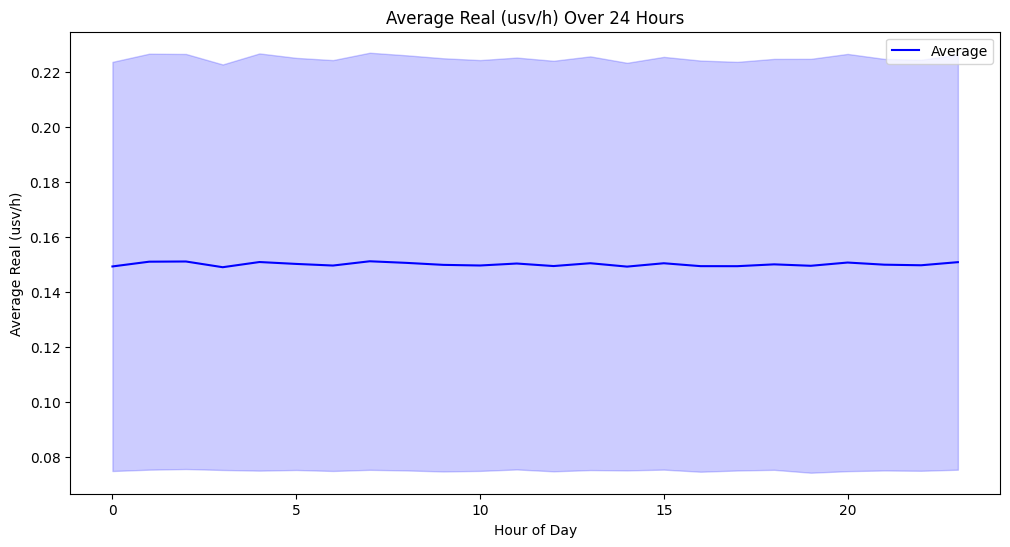

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize empty DataFrame
df = pd.DataFrame()

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    df = pd.concat([df, data])

# Convert 'time' column to datetime and set it as index
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df.set_index('time', inplace=True)

# Resample data by hourly mean
df_resampled = df.resample('H').mean()

# Resample data by hourly standard deviation
df_std = df.resample('H').std()

# Plotting
plt.figure(figsize=(12,6))

# Create a line plot for the mean of 'real(usv/h)' over 24 hours
sns.lineplot(x=df_resampled.index.hour, y=df_resampled['real(usv/h)'], color='blue', label='Average')

# Add a shaded area for the standard deviation
plt.fill_between(df_resampled.index.hour, df_resampled['real(usv/h)'] - df_std['real(usv/h)'], df_resampled['real(usv/h)'] + df_std['real(usv/h)'], color='blue', alpha=0.2)

plt.xlabel('Hour of Day')
plt.ylabel('Average Real (usv/h)')
plt.title('Average Real (usv/h) Over 24 Hours')
plt.legend()
plt.show()


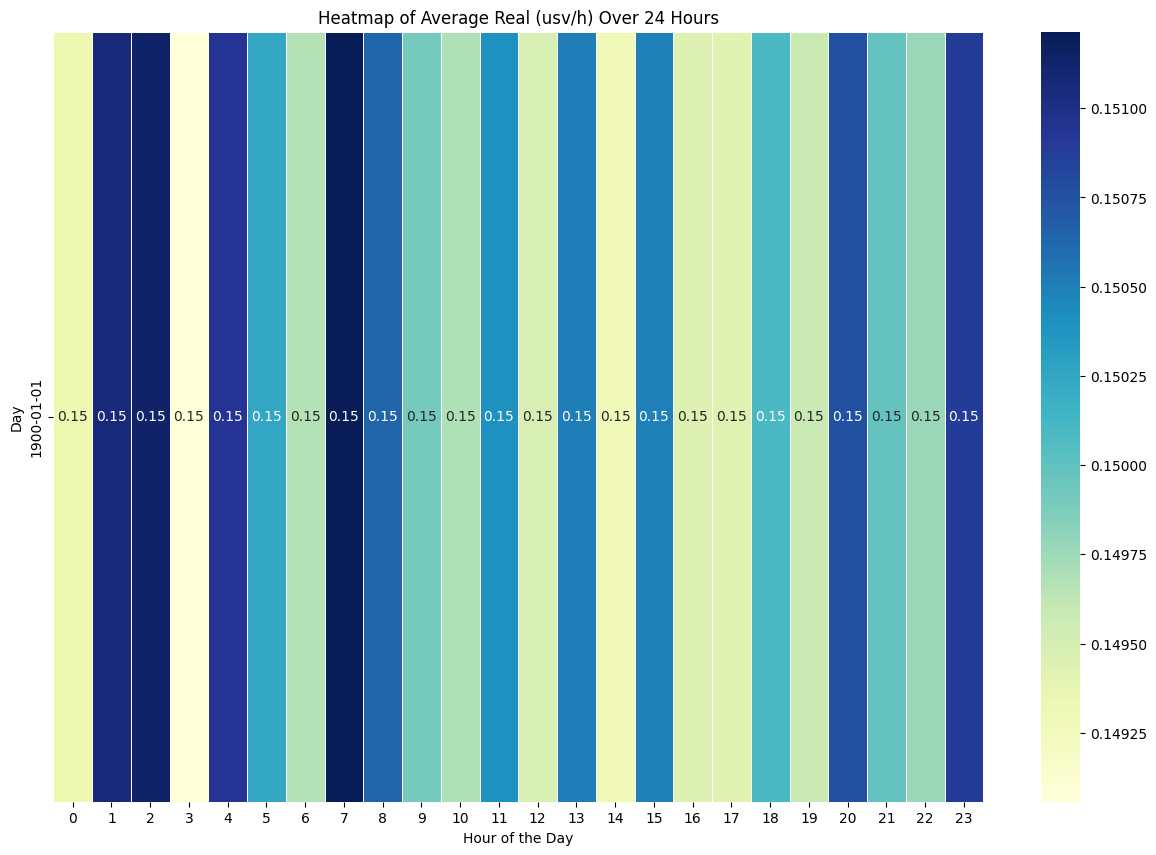

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Initialize empty DataFrame
df = pd.DataFrame()

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    df = pd.concat([df, data])

# Convert 'time' column to datetime and set it as index
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S')
df.set_index('time', inplace=True)

# Resample data by hourly mean
df_resampled = df.resample('H').mean()

# Reset index to create hour column
df_resampled.reset_index(inplace=True)

# Create hour and day columns
df_resampled['hour'] = df_resampled['time'].dt.hour
df_resampled['day'] = df_resampled['time'].dt.date

# Pivot the data for heatmap
df_pivot = df_resampled.pivot(index='day', columns='hour', values='real(usv/h)')

# Plotting
plt.figure(figsize=(15,10))
sns.heatmap(df_pivot, cmap="YlGnBu", annot=True, fmt=".2f", linewidths=.5)
plt.title('Heatmap of Average Real (usv/h) Over 24 Hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Day')
plt.show()


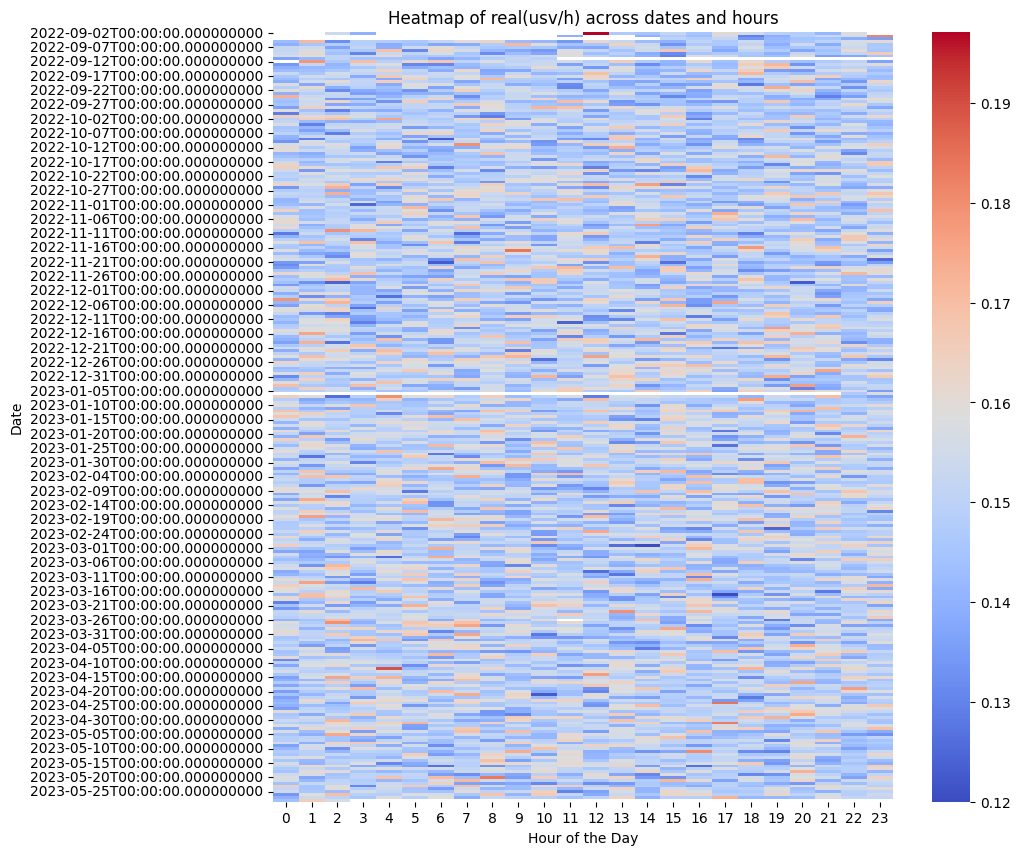

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Convert 'time' to datetime and extract the hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Pivot the DataFrame to get a matrix where each row is a date and each column is an hour
df_pivot = df.pivot_table(index='date', columns='time', values='real(usv/h)', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, cmap='coolwarm')
plt.title('Heatmap of real(usv/h) across dates and hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


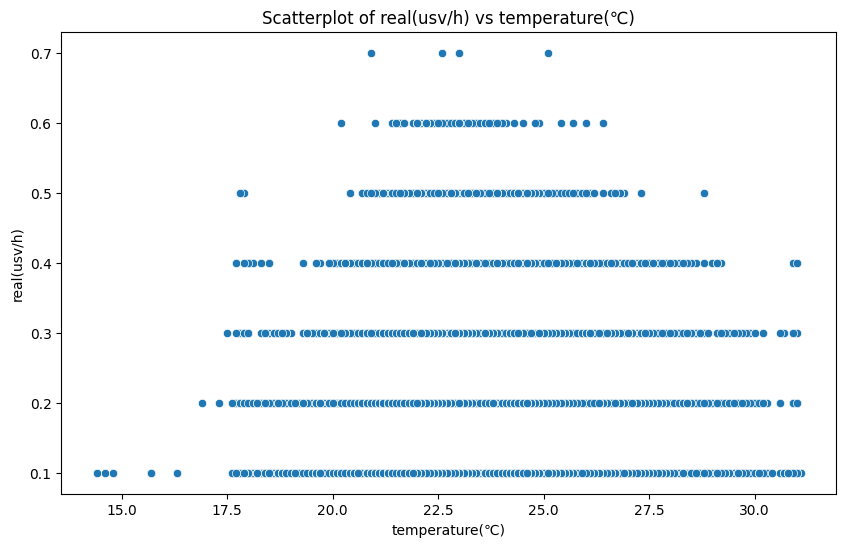

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Create the scatterplot
plt.figure(figsize=(10,6))
sns.scatterplot(x='temperature(℃)', y='real(usv/h)', data=df)
plt.title('Scatterplot of real(usv/h) vs temperature(℃)')
plt.show()


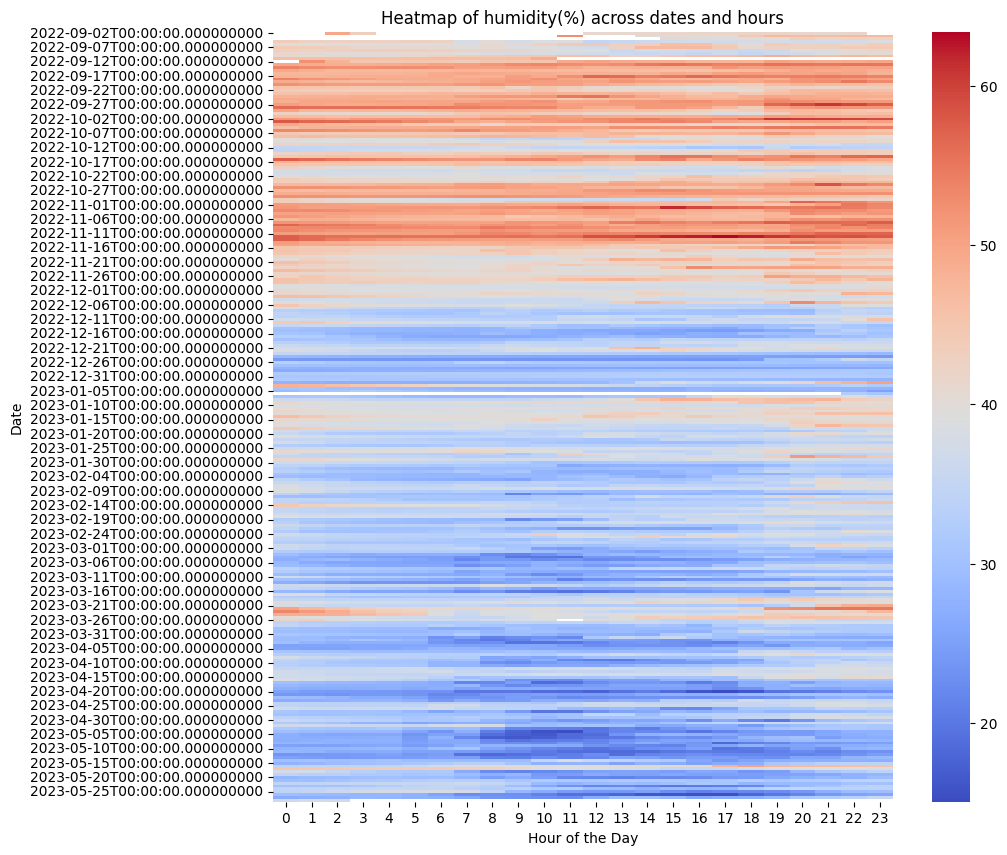

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Convert 'time' to datetime and extract the hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Pivot the DataFrame to get a matrix where each row is a date and each column is an hour
df_pivot = df.pivot_table(index='date', columns='time', values='humidity(%)', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, cmap='coolwarm')
plt.title('Heatmap of humidity(%) across dates and hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


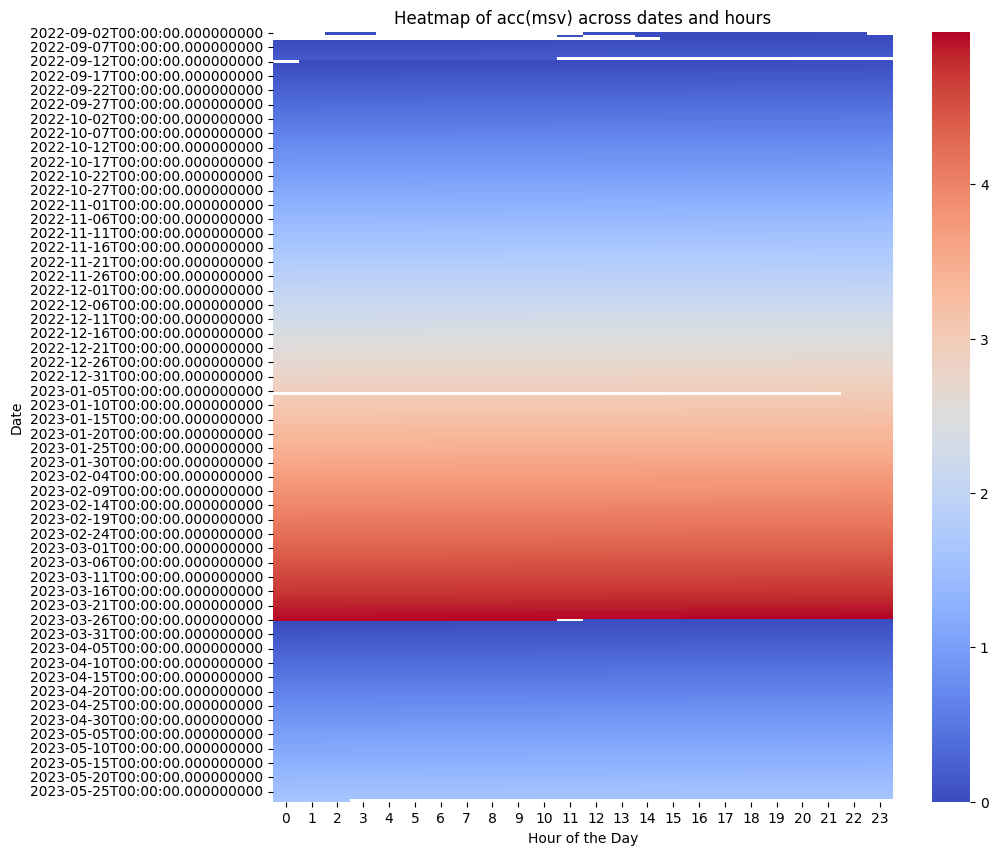

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Convert 'time' to datetime and extract the hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Pivot the DataFrame to get a matrix where each row is a date and each column is an hour
df_pivot = df.pivot_table(index='date', columns='time', values='acc(msv)', aggfunc=np.mean)

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, cmap='coolwarm')
plt.title('Heatmap of acc(msv) across dates and hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()


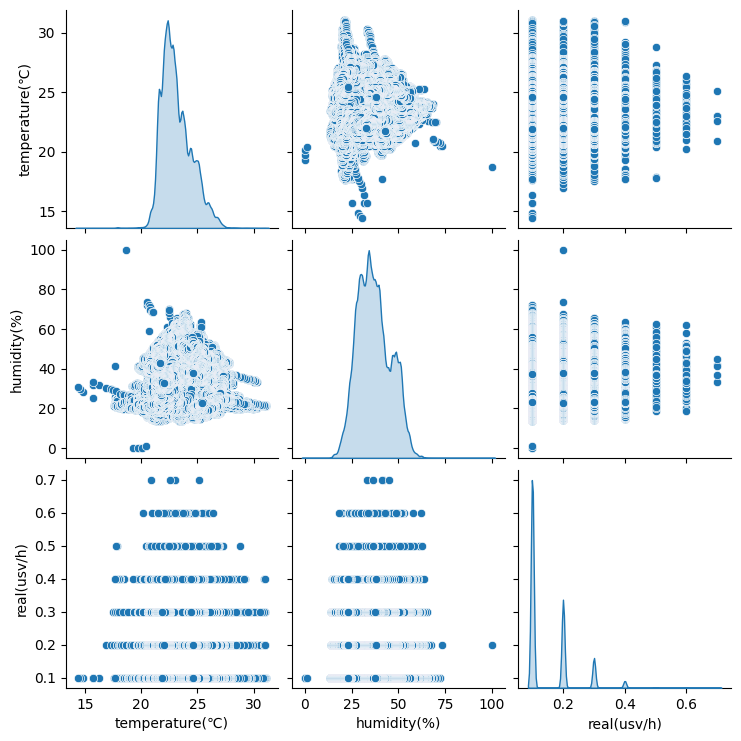

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Convert 'time' to datetime and extract the hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Plot pairwise relationships in the dataset
sns.pairplot(df[['temperature(℃)', 'humidity(%)', 'real(usv/h)']], diag_kind='kde')

plt.show()


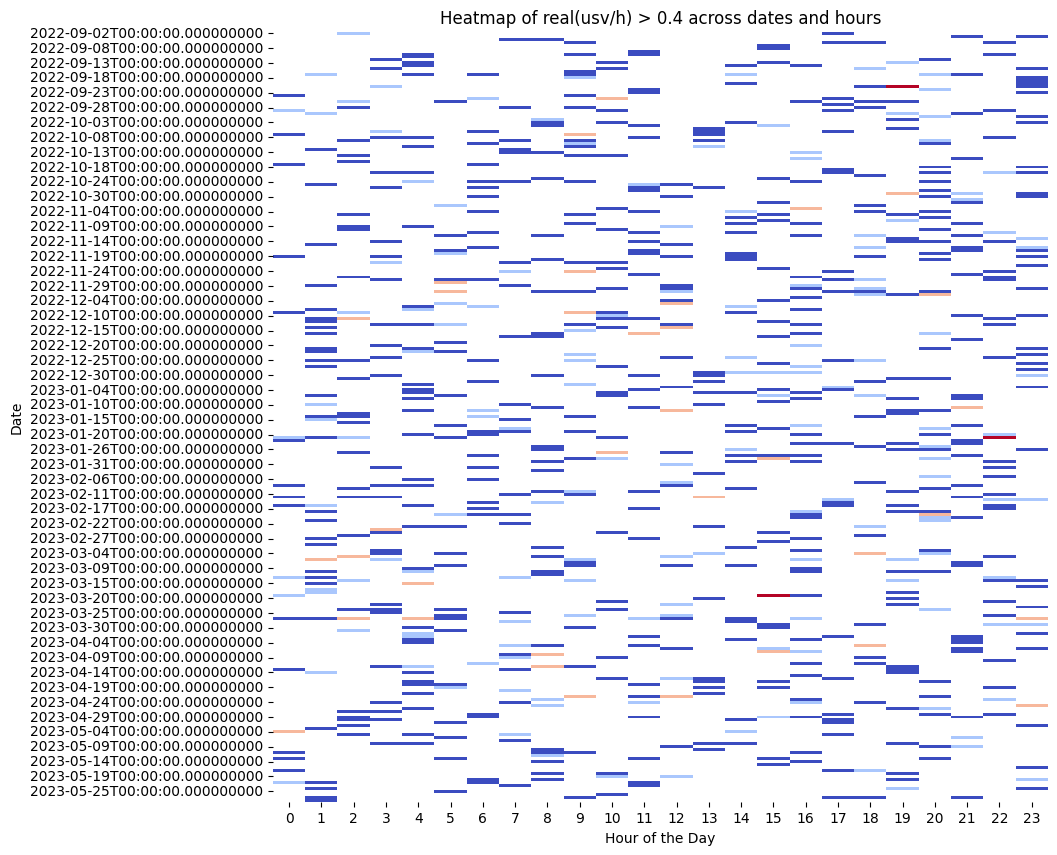

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the directory path where the CSV files are stored
data_dir = 'data/'

# List of CSV files in the directory
csv_files = [data_dir + f for f in os.listdir(data_dir) if f.endswith('.csv')]

# Define column names
column_names = ['time', 'temperature(℃)', 'humidity(%)', 'real(usv/h)', 'avg(usv/h)', 'acc(msv)']

# Initialize an empty DataFrame
df = pd.DataFrame()

# Read each CSV and concatenate to the DataFrame
for file in csv_files:
    data = pd.read_csv(file, skiprows=2, names=column_names, usecols=range(6))
    # Extract date from filename
    date = pd.to_datetime(file.replace(".csv", "").split("_")[-1])  
    data['date'] = date
    df = pd.concat([df, data])

# Convert 'time' to datetime and extract the hour
df['time'] = pd.to_datetime(df['time'], format='%H:%M:%S').dt.hour

# Filter rows where 'real(usv/h)' is greater than 0.4
df_filtered = df[df['real(usv/h)'] > 0.4]

# Pivot the DataFrame to get a matrix where each row is a date and each column is an hour
df_pivot = df_filtered.pivot_table(index='date', columns='time', values='real(usv/h)', aggfunc='count')

# Create the heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df_pivot, cmap='coolwarm', cbar=False)
plt.title('Heatmap of real(usv/h) > 0.4 across dates and hours')
plt.xlabel('Hour of the Day')
plt.ylabel('Date')
plt.show()
